## Mandelbrotset using PyTorch
-----
Code refined from: https://gist.github.com/kpierans/04b1303febbc4fa6c324ad41f4367c08.
Current values from my Windows 11 machine with a Ryzen 7 3700X, 32 Gb RAM, and an RTX 2080 Super.
Note that PyTorch needs the first run of `create_pixels` to build the graph which is why this first run takes longer. Somehow the second run also takes a little longer than subsequent runs - I am not totally sure why.

In [1]:
## Imports
import torch
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from datetime import datetime

## Setup
max_its = 256
x_min, x_max, y_min, y_max = -2.0, 1.0, -1.1, 1.1
width, height = 3200, 2400

In [2]:
def create_pixels(xmin=x_min, xmax=x_max, ymin=y_min, ymax=y_max, w=width, h=height, maxiter=max_its):
    ## Inits
    x = torch.linspace(xmin, xmax, w, dtype=torch.float).cuda().type(torch.half)
    y = torch.linspace(ymin, ymax, h, dtype=torch.float).cuda().type(torch.half)
    cx, cy = torch.meshgrid([x,y], indexing="ij")
    zx = torch.zeros(w*h, dtype=torch.float32).cuda().type(torch.half).resize_as_(cx)
    zy = torch.zeros(w*h, dtype=torch.float32).cuda().type(torch.half).resize_as_(cy)
    k = torch.full((w*h,), maxiter, dtype=torch.int16).reshape(w,h).cuda()

    ## Already escaped pixels should be kept
    not_upated = torch.ones_like(cx).to(torch.bool).cuda()
    
    ## Main Algorithm
    for i in range(maxiter):
        zx2 = zx**2
        zy2 = zy**2
        inf = (zx2+zy2) > 4 
        k[torch.logical_and(inf, not_upated)] = i 
        not_upated[inf] = False
        zy = (zx+zx)*zy + cy
        zx = zx2 - zy2 + cx
        
    return k.t()

## For building the graph
_ = create_pixels()
_ = create_pixels()

In [3]:
start = timer()
image = create_pixels()
dt = timer() - start
print("Mandelbrot data created in %f s" % dt)

Mandelbrot data created in 0.263269 s


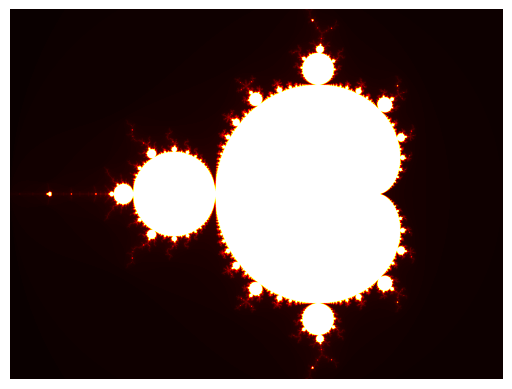

In [4]:
image = image.cpu()
plt.imshow(image, cmap="hot")
plt.axis('off')
plt.show()